In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
%matplotlib inline
from sklearn.mixture import GaussianMixture

In [2]:
support_df = pd.read_csv('technical_support_data.csv')
support_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [3]:
support_attr = support_df.iloc[:,1:]
support_attr

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.00,75,25
1,12,2.0,150,0.01,0.50,5,95
2,5,1.0,35,0.02,0.20,90,10
3,3,2.0,8,0.01,0.70,5,95
4,45,2.3,54,0.15,0.00,99,1
5,47,3.1,132,0.30,0.03,100,0
6,12,4.0,154,0.02,0.05,100,0
7,165,1.2,32,0.03,0.00,95,5
8,321,1.0,5,0.21,0.00,60,40
9,22,3.3,140,0.14,0.01,95,5


In [4]:
support_df_scaled = support_attr.apply(zscore)
support_df_scaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


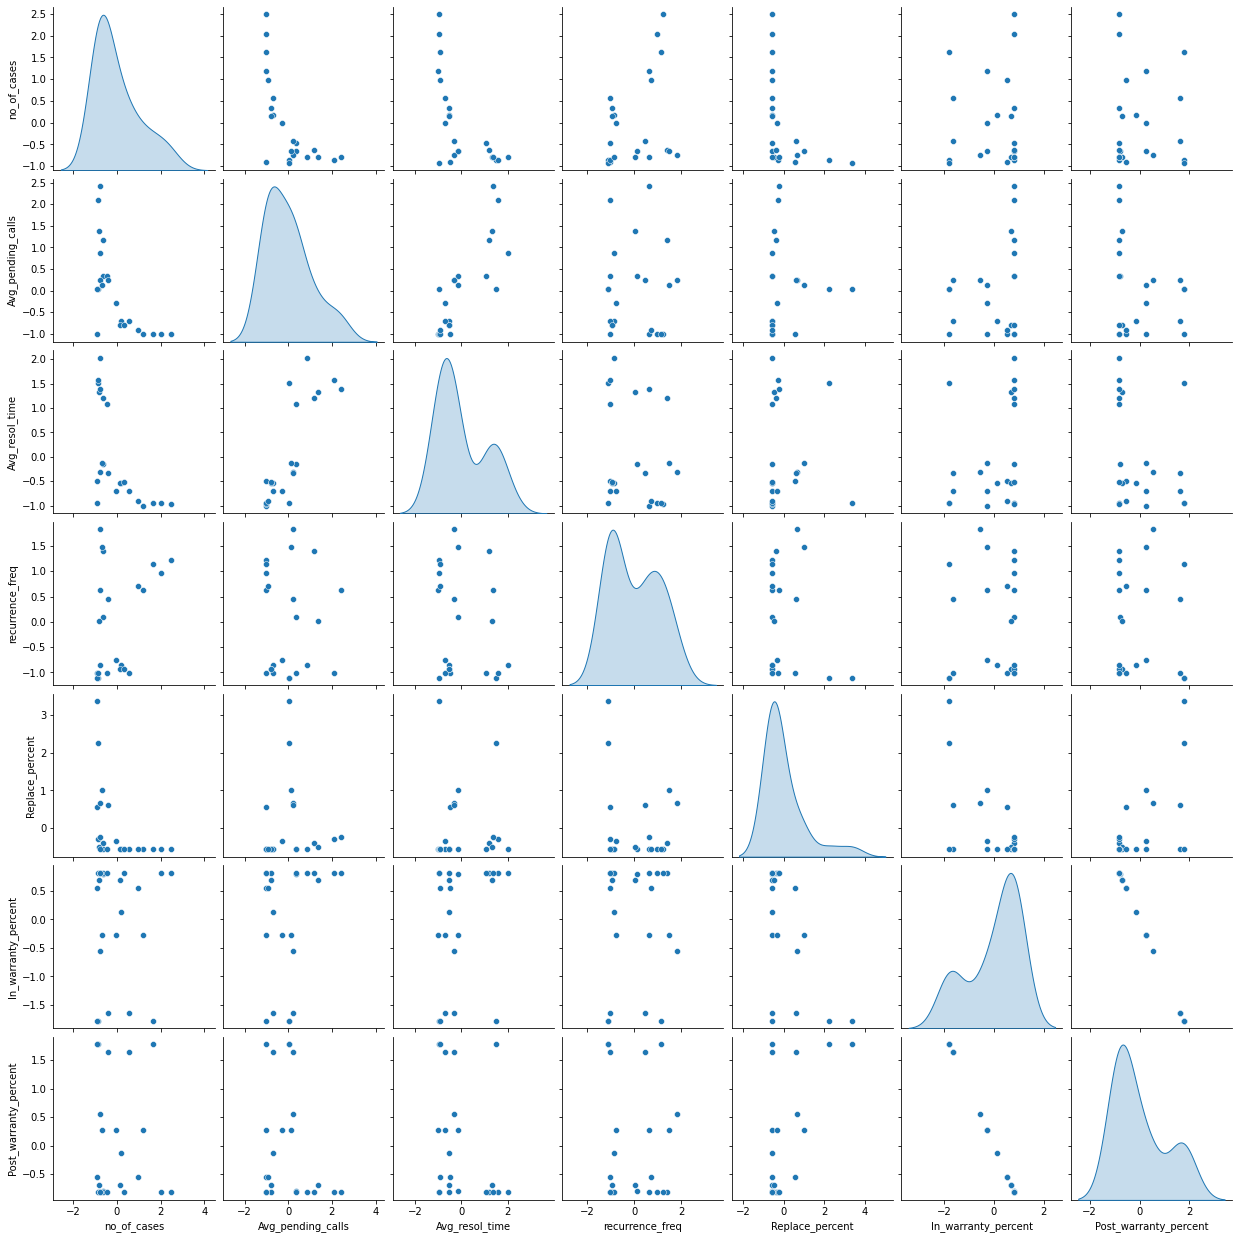

In [5]:
sns.pairplot(support_df_scaled, diag_kind='kde')

## Group in to Similar Clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

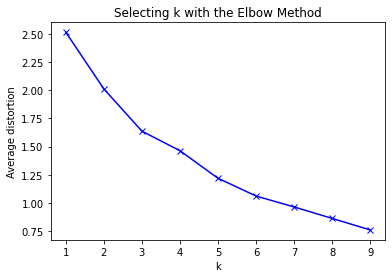

In [6]:
from scipy.spatial.distance import cdist #cdist calculates distance b/w two point
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(support_df_scaled)
    prediction = model.predict(support_df_scaled)
    meanDistortions.append(sum(np.min(cdist(support_df_scaled, model.cluster_centers_, 'euclidean'), axis=1))/ len(support_df_scaled))
    
    # cdist(support_df_scaled, model.cluster_centers_) - distance b/w each point and the model cluster centroid
    # np.min(cdist(support_df_scaled, model.cluster_centers_) - take the minimum distance
    # sum(np.min(cdist(support_df_scaled, model.cluster_centers_)))/ len(support_df_scaled) - calculate the mean
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [7]:
def evaludate_at_different_k(k):
    final_model=KMeans(k)
    final_model.fit(support_df_scaled)
    prediction=final_model.predict(support_df_scaled)

    #Append the prediction 
    support_df["GROUP"] = prediction
    support_df_scaled["GROUP"] = prediction
    print("Groups Assigned : \n")
    print(support_df_scaled.head())
    print(support_df.head())
    
#     support_df_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
    support_df_scaled.boxplot( figsize=(15,10))
    plt.show()

Groups Assigned : 

   no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
0     0.179429          -0.701207       -0.538351        -0.843188   
1    -0.862176           0.027143        1.510857        -1.101765   
2    -0.908323          -1.013357       -0.486253        -1.015573   
3    -0.921508           0.027143       -0.955140        -1.101765   
4    -0.644625           0.339294       -0.156296         0.104930   

   Replace_percent  In_warranty_percent  Post_warranty_percent  GROUP  
0        -0.561463             0.138067              -0.138067      2  
1         2.245854            -1.778204               1.778204      0  
2         0.561463             0.548696              -0.548696      2  
3         3.368781            -1.778204               1.778204      0  
4        -0.561463             0.795074              -0.795074      2  
                       PROBLEM_TYPE  no_of_cases  Avg_pending_calls  \
0   Temperature control not working          170        

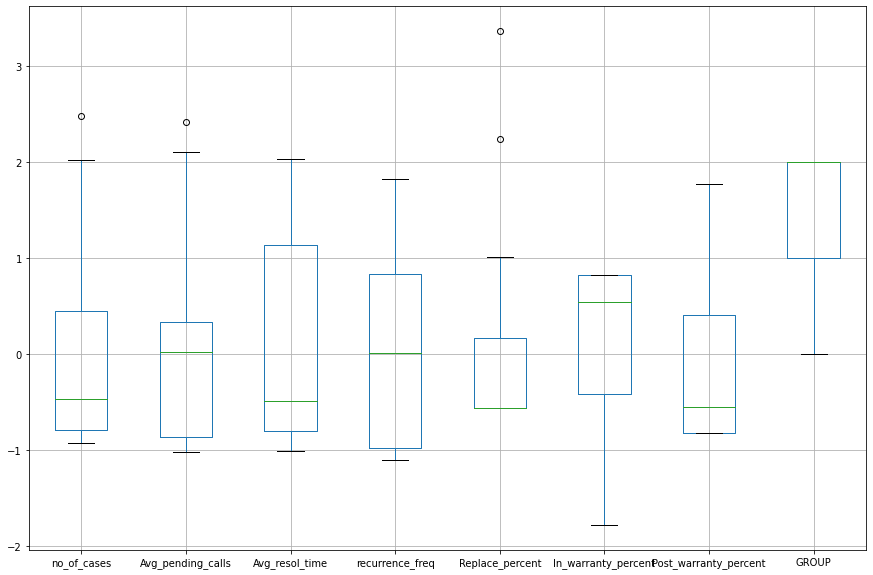

Groups Assigned : 

   no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
0     0.179429          -0.701207       -0.538351        -0.843188   
1    -0.862176           0.027143        1.510857        -1.101765   
2    -0.908323          -1.013357       -0.486253        -1.015573   
3    -0.921508           0.027143       -0.955140        -1.101765   
4    -0.644625           0.339294       -0.156296         0.104930   

   Replace_percent  In_warranty_percent  Post_warranty_percent  GROUP  
0        -0.561463             0.138067              -0.138067      0  
1         2.245854            -1.778204               1.778204      1  
2         0.561463             0.548696              -0.548696      0  
3         3.368781            -1.778204               1.778204      1  
4        -0.561463             0.795074              -0.795074      0  
                       PROBLEM_TYPE  no_of_cases  Avg_pending_calls  \
0   Temperature control not working          170        

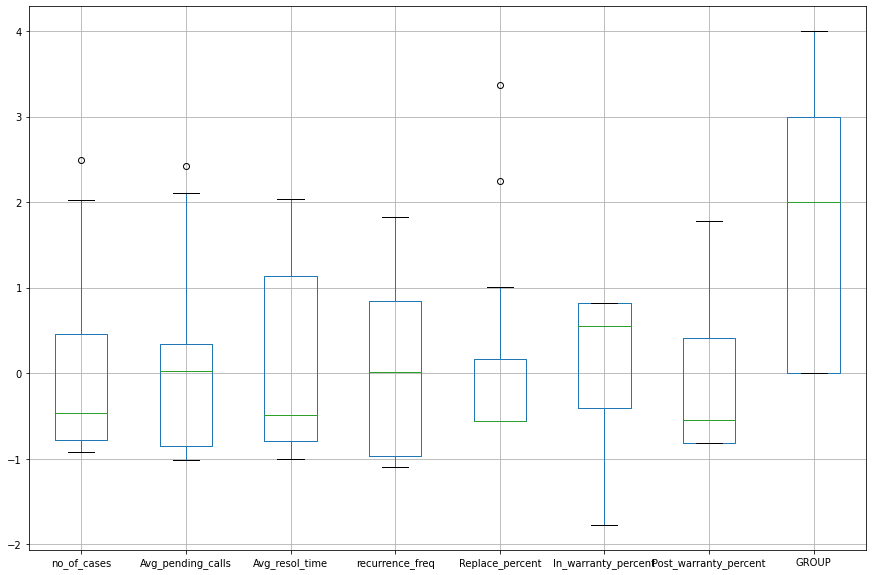

In [8]:
for k in [3,5]:
    evaludate_at_different_k(k)

# K-Means With iris data

In [5]:
#Iris Data
iris_data = datasets.load_iris()
X = iris_data.data
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Text(0.5, 0.92, 'K Means')

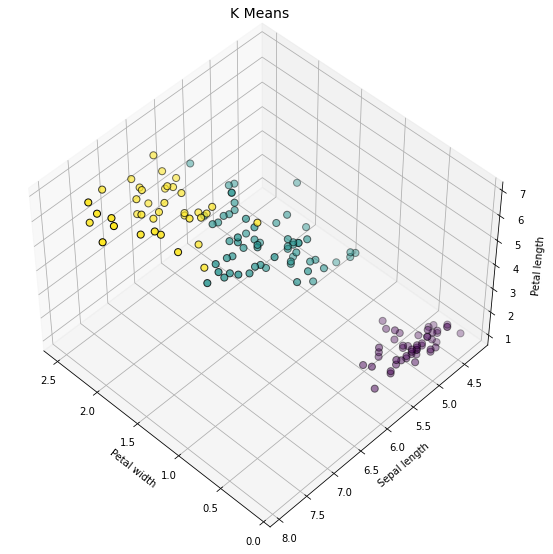

In [46]:


#Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
labels = kmeans.labels_
X
#3D - Plotting

fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:,0], X[:, 2], c=labels.astype(np.float), edgecolors='k', s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)


#### In K-Means, we do what is called “hard labeling”, where we simply add the label of the maximum probability. However, certain data points that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. In such circumstances, we look at all the probabilities instead of the max probability. This is known as “soft labeling”

# Mixture Models

Text(0.5, 0.92, 'Gaussian Mixture Model')

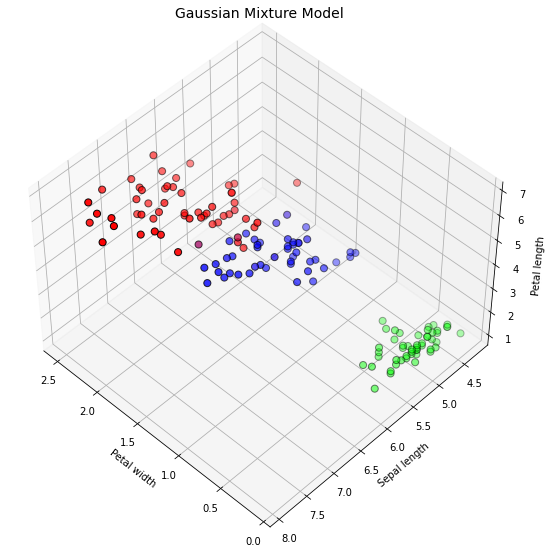

In [49]:
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
prob_lists = gmm.predict_proba(X)

#3D - Plotting

colored_arrays = np.matrix(prob_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]

fig = plt.figure(1, figsize=(10,7))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:,0], X[:, 2], c=colored_tuples, edgecolors='k', s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

##### The RGB values are based on the nearness to each of the red, blue and green clusters. If you look at the datapoints near the boundary of the blue and red cluster, you shall see purple, indicating the datapoints are close to either clusters

# Hidden Markov Model

### It's used for time series analysis. In a Markov Model, we look for states and the probability of the next state given the current state.

In [50]:
import sys

!{sys.executable} -m pip install hmmlearn

     |████████████████████████████████| 120 kB 2.4 MB/s eta 0:00:01


Fitting a model with 14 free scalar parameters with only 13 data points will result in a degenerate solution.


Text(0.5, 1.0, 'HMM Model')

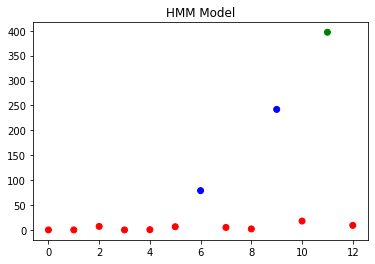

In [52]:
from hmmlearn import hmm

boston_data = datasets.load_boston()
boston_data = boston_data.data[1, :]

gm_hmm = hmm.GaussianHMM(n_components=3)
gm_hmm.fit(boston_data.reshape(-1,1))
states = gm_hmm.predict(boston_data.reshape(-1,1))

#Plot
color_dict = {0:"r",1:"g",2:"b"}
color_array = [color_dict[i] for i in states]
plt.scatter(range(len(boston_data)), boston_data, c=color_array)
plt.title("HMM Model")